# Get the Data

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Doubt**: File size of merged_2.csv and e1_merged.csv are different 

In [34]:
#train = pd.read_csv('/kaggle/input/fi-optimun-frecuency/merged_2.csv', sep=';')
train = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e1_merged.csv', sep=';')
train.columns

Index(['Sample', 'Frequency (GHz)', 'LG (mV)', 'HG (mV)', 'Thickness (mm)'], dtype='object')

Samples has serveral Thickness

In [35]:
train['Thickness (mm)'].value_counts().index.sort_values().tolist()

[0.0, 0.04, 0.07, 0.1, 0.2, 0.29, 0.36, 0.57, 1.85, 2.05, 2.25, 3.0]

51 frecuencies (Ghz)

In [36]:
train['Frequency (GHz)'].value_counts().index.sort_values()

Index([100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0,
       200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0,
       300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 370.0, 380.0, 390.0,
       400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0,
       500.0, 510.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0, 590.0,
       600.0],
      dtype='float64', name='Frequency (GHz)')

15 types of plastic

In [37]:
train['Sample'].value_counts().index.sort_values()

Index(['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1', 'K1', 'L1',
       'M1', 'N1', 'REF'],
      dtype='object', name='Sample')

### Add data of Experiments 2, 3 and 4
**TODO**: Add temparature and RH to experiments 3 and 4

In [38]:
train_e1 = train.copy()
train_e1 = train_e1.drop(columns=['Thickness (mm)']) # Remove `Thickness (mm)`

train_e1['num_experiment'] = 'e1'
train_e1['Sample_original'] = 'None'

# ['E1', 'H1', 'REF']
train_e2 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e2_merged.csv', sep=';') 
train_e2['num_experiment'] = 'e2'
train_e2['Sample_original'] = 'None'

# ['REF_1', 'REF_10', 'REF_11', 'REF_12', 'REF_13', 'REF_14', 'REF_15', 'REF_2', 'REF_3', 'REF_4', 'REF_5', 'REF_6', 'REF_7', 'REF_8', 'REF_9']
train_e3 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e3_merged.csv', sep=',') 
train_e3['num_experiment'] = 'e3'
train_e3['Sample_original'] = train_e3['Sample']
train_e3['Sample'] = 'REF'

# ['B1_12', 'B1_2', 'B1_5', 'B1_9', 'C1_11', 'C1_14', 'C1_4', 'C1_7', 'E3_10', 'E3_13', 'E3_3', 'E3_6', 'REF_1', 'REF_15', 'REF_8']
train_e4 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e4_merged.csv', sep=',')
train_e4['num_experiment'] = 'e4'
train_e4['Sample_original'] = train_e4['Sample']

Replace name of Sample from experiment 4 by name of experiment 1

In [39]:
df_temp = train_e4.query('Sample.str.startswith("B1")', engine="python")
df_temp = df_temp.drop(columns=['Sample'])
df_temp['Sample'] = 'B1'
df_temp2 = train_e4.query('Sample.str.startswith("C1")', engine="python")
df_temp2 = df_temp2.drop(columns=['Sample'])
df_temp2['Sample'] = 'C1'
df_temp3 = train_e4.query('Sample.str.startswith("E3")', engine="python")
df_temp3 = df_temp3.drop(columns=['Sample'])
df_temp3['Sample'] = 'E1'
df_temp4 = train_e4.query('Sample.str.startswith("REF")', engine="python")
df_temp4 = df_temp4.drop(columns=['Sample'])
df_temp4['Sample'] = 'REF'
train_e4 = pd.concat([df_temp, df_temp2, df_temp3, df_temp4]).sort_index()

In [40]:
train_e1['index_original'] = train_e1.index
train_e1.head()


,Sample,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,index_original
0,A1,100.0,-7.080942,-0.854611,e1,None,0
1,A1,100.0,67.024785,0.244141,e1,None,1
2,A1,100.0,124.893178,-1.098776,e1,None,2
3,A1,100.0,91.075571,0.000000,e1,None,3
4,A1,100.0,48.956174,0.122094,e1,None,4


In [41]:
train_e2['index_original'] = train_e2.index
train_e2.head()

,Sample,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,index_original
0,E1,100.0,27.469173,0.976682,e2,None,0
1,E1,100.0,70.931511,-0.366259,e2,None,1
2,E1,100.0,1.342937,-0.488353,e2,None,2
3,E1,100.0,31.253815,-0.122094,e2,None,3
4,E1,100.0,48.467830,0.488353,e2,None,4


In [42]:
train_e3['index_original'] = train_e3.index
train_e3.head()


,Sample,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,index_original
0,REF,100.0,1.098767,0.000012,e3,REF_1,0
1,REF,100.0,0.854596,0.244176,e3,REF_1,1
2,REF,100.0,0.976682,0.610411,e3,REF_1,2
3,REF,100.0,1.709193,-0.244164,e3,REF_1,3
4,REF,100.0,-0.122085,-0.488341,e3,REF_1,4


In [43]:
train_e4['index_original'] = train_e4.index
train_e4.head()


,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,Sample,index_original
0,100.0,35.923574,-0.335747,e4,REF_1,REF,0
1,100.0,58.600903,0.763011,e4,REF_1,REF,1
2,100.0,70.473691,0.152630,e4,REF_1,REF,2
3,100.0,56.220242,0.061041,e4,REF_1,REF,3
4,100.0,46.575510,0.579929,e4,REF_1,REF,4


In [44]:
train_get = pd.concat([train_e1, train_e2, train_e3, train_e4])
train_get = train_get.rename(columns = {'Sample':'target', 'Frequency (GHz)': 'freq' }).drop(columns=['index_original'])                                                                                  
train_get.head()


,target,freq,LG (mV),HG (mV),num_experiment,Sample_original
0,A1,100.0,-7.080942,-0.854611,e1,None
1,A1,100.0,67.024785,0.244141,e1,None
2,A1,100.0,124.893178,-1.098776,e1,None
3,A1,100.0,91.075571,0.000000,e1,None
4,A1,100.0,48.956174,0.122094,e1,None


In [45]:
train_get['target'].value_counts()

target
REF    824929
E1     698285
H1     578994
C1     274079
B1     259617
L1     173344
A1     172103
M1     170676
D1     170548
G1     166421
N1     159814
J1     158264
I1     157814
F1     154569
K1     152038
Name: count, dtype: int64

## Convert the data to a format you can easily manipulate



In [46]:


#train = pd.concat([train[['Frequency (GHz)', 'LG (mV)', 'HG (mV)']],train[['target']]], axis=1)
train_get.to_csv('4-experiment_15_types.csv', index=False)


Select only tree types of plastic `B1`, `C1`, `E1` and `REF`

In [48]:
train_get = train_get[(train_get.target == 'B1') | (train_get.target == 'C1') | (train_get.target == 'E1') | (train_get.target == 'REF')]

## Sample a test set, put it aside, and never look at it
The test set is used after the model has been fully trained to assess the model's performance on completely unseen data

Data is split in a stratified fashion, using this at  theTarget as  class labels  
**Conjecture**: It is assumed that there is time independence in the laser measurement..

In [49]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_get, test_size=0.2, random_state=42, stratify=train_get.target)


Check the target distribution of target in a plotted bar. The frequency or proportion are uniform in train and test dataset

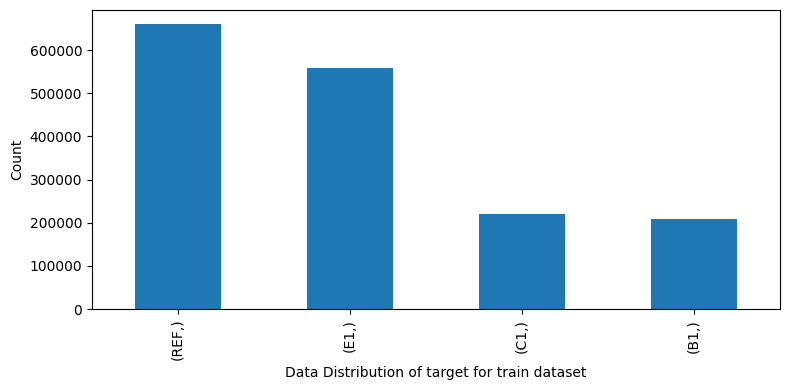

In [50]:
import matplotlib.pylab as plt
ax = train_set[['target']].value_counts().transpose().plot.bar(figsize=(8, 4), legend=False)
ax.set_xlabel('Data Distribution of target for train dataset')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

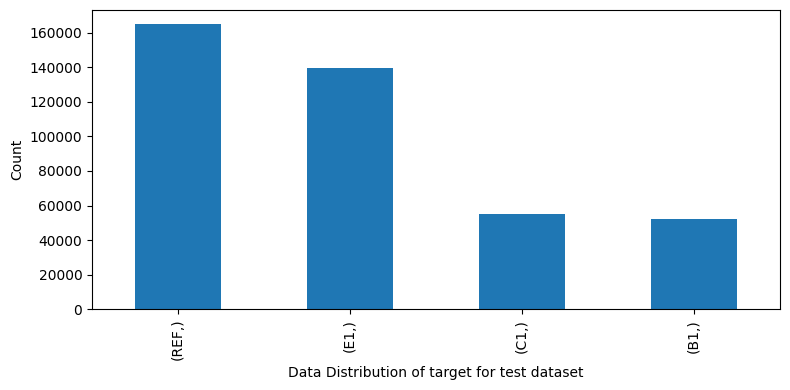

In [51]:
ax = test_set[['target']].value_counts().transpose().plot.bar(figsize=(8, 4), legend=False)
ax.set_xlabel('Data Distribution of target for test dataset')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

 # Explore the data

In [1]:
train_ex = train_set.copy()
train_ex.head()

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original
196045,C1,200.0,7.019900,-0.152594,e4,C1_4
718030,E1,280.0,2.319619,0.488329,e1,None
64767,E1,590.0,-0.488341,29.422536,e2,None
79723,E1,190.0,19.899890,0.610471,e2,None
359302,C1,200.0,4.761323,0.488353,e1,None


## Visualize one HG (mV) a one freq like time series  

In [117]:
train_get.groupby([train_get['target'], train_get['num_experiment']]).count()

freq  LG (mV)  HG (mV)  Sample_original
target num_experiment                                           
B1     e1              152817   152817   152817           152817
       e4              106800   106800   106800           106800
C1     e1              166224   166224   166224           166224
       e4              107855   107855   107855           107855
E1     e1              157089   157089   157089           157089
       e2              428593   428593   428593           428593
       e4              112603   112603   112603           112603
REF    e1              153315   153315   153315           153315
       e2              134226   134226   134226           134226
       e3              424998   424998   424998           424998
       e4              112390   112390   112390           112390

In [ ]:
Y_e1 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e1')]['HG (mV)'].values
Y_e2 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e2')]['HG (mV)'].values
Y_e4 = train_get[(train_get.target=='E1')&(train_get.freq==350.0)&(train_get.num_experiment=='e4')]['HG (mV)'].values
df_tmp = pd.DataFrame(np.hstack((Y_e1[:2301].reshape(-1, 1),Y_e2[:2301].reshape(-1, 1),Y_e4.reshape(-1, 1))),
                      columns=['e1', 'e2', 'e4'],
                      index=np.arange(0, 2301, 1))

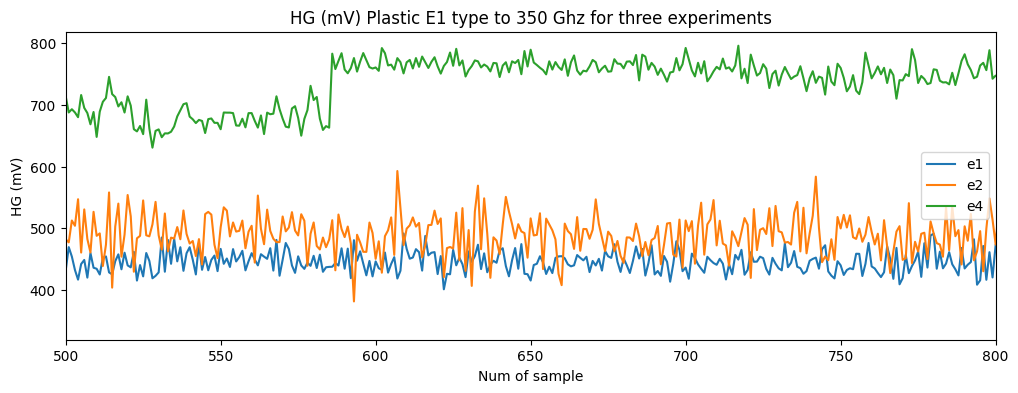

In [113]:
_ = df_tmp.plot(figsize=(12,4), xlim = ([500,800]), 
                ylabel = 'HG (mV)',
                xlabel = 'Num of sample',
                title= 'HG (mV) Plastic E1 type to 350 Ghz for three experiments' )

In [ ]:
train_ts_low_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].quantile(0.05)
train_ts_high_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].quantile(0.95)
train_ts_filtering = np.where(train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'] < train_ts_low_quan,
                                train_ts_low_quan,
                                train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'])

train_ts_filtering = pd.Series(train_ts_filtering, index=train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].index.to_numpy())
train_ts_filtering = np.where(train_ts_filtering > train_ts_high_quan,
                              train_ts_high_quan,
                              train_ts_filtering)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, train_ts_filtering)
ax.set_ylim([380, 525])
ax.set_title('Filtering Outliers of time series of 350 GHz to HG (mV) of plastic type E1 of Experiment 1')
fig.show()


## Visualize distributions
Knowledge of various sampling and data generating distributions allows us to quantify potential errors in an estimate that might be due to random variation.

In [ ]:
train_ex = train_ex.astype({"freq": int,})
train_ex.info()


In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

for f in train_ex['freq'].value_counts().index.sort_values().tolist():
    freq = f
    ncols = 2
    nrows = 2
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r ,c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"All samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()        

## Study Type of distribution to one frecuency

In [ ]:
for f in [320]:
    freq = f
    ncols = 5
    nrows = 3
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r, c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"Distributions of density estimation to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()   

#### Summary of the numerical attributes
Compute mean of groups

In [ ]:

df_tmp = train_ex[(train_ex.freq == freq)]
grouped = df_tmp['HG (mV)'].groupby(df_tmp['target'])

ax = grouped.mean().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Mean (mV) by HG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()


In [ ]:

df_tmp = train_ex[(train_ex.freq == freq)]
grouped = df_tmp['LG (mV)'].groupby(df_tmp['target'])

ax = grouped.mean().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Mean (mV) by LG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()


In [ ]:
ax = grouped.std().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Standard deviation (mV) by LG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()

**Insights**: Assuming a normal distribution can lead to underestimation of extreme events 

#### Predicts that anamolous measures
The tails of a distribution correspond to the extreme values (small and large). Long tails, and guarding against them, are widely recognized in practical work. Nassim Taleb has proposed the black swan theory, which predicts that anamolous events, such as a stock market crash, are much more likely to occur than would be predicted by the normal distribution. 

In [ ]:
from scipy import stats
temp_t = t[13]
fig, ax = plt.subplots(figsize=(4, 4))
df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == temp_t)]
#stats.probplot(df_tmp['LG (mV)'], plot=ax)
stats.probplot(df_tmp['LG (mV)'], plot=ax)

plt.suptitle(f"Sample of {temp_t} data against the quantiles of a specified theoretical distribution {freq} Ghz", y=0.93,fontsize=10)
plt.tight_layout()
plt.show()


**Insights**: The points are far below the line for low values and far 
above the line for high value. Theree are much more likely t 
observe extreme values than would be expected if the data had a norm l
distribution

## Identify the promising transformations you may want to apply
Target variable takes only a limited number of values. Encode target (categorical features) as an integer array.  
**Question**: How does doing this in the previous phase (Convert the data to a format you can easily manipulate) affect the classifier?

In [2]:
from sklearn.preprocessing import OrdinalEncoder
label_train_ex = train_ex.copy()
ordinal_encoder = OrdinalEncoder()
label_train_ex['target'] = ordinal_encoder.fit_transform(train_ex[['target']])

In [59]:
ordinal_encoder.categories_

[array(['B1', 'C1', 'E1', 'REF'], dtype=object)]

### % of missing values
No missing values in each column of training data

In [3]:
print(label_train_ex.shape)
missing_val_count_by_column = (label_train_ex.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(1645528, 6)
Series([], dtype: int64)


### Type of distribution in frecuency
Representation of the distribution of nums of sample by frecuency. 

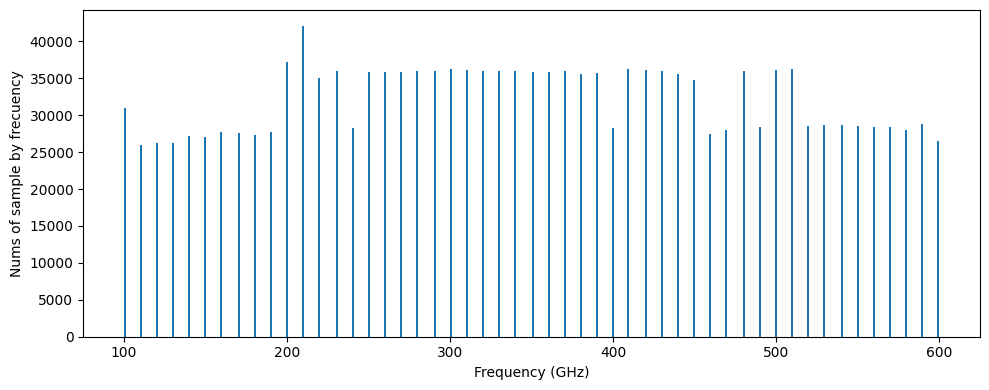

In [4]:
ax = label_train_ex['freq'].plot.hist(figsize=(10, 4), bins=408)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums of sample by frecuency')
plt.tight_layout()
plt.show()

### Balanced samples of frecuency 

In [29]:
label_train_ex.head()

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,index_original
46585,3.0,260.0,2.319619,-0.000012,e3,REF_1,46585
164708,2.0,280.0,1.953363,1.342893,e2,None,164708
43955,0.0,400.0,0.518862,202.173102,e4,B1_12,43955
236165,0.0,300.0,2.930045,1.220846,e1,None,236165
117410,3.0,350.0,1.403980,704.858977,e3,REF_11,117410


In [ ]:
mode = label_train_ex.groupby(['target', 'freq']).size().mode()[0]

# Function to reduce samples to the mode value
def reduce_to_mode(df, target, frequency, mode):
    # Filter the DataFrame for the specific sample and frequency
    freq_df = df[(df['target'] == target) & (df['freq'] == frequency)]
    # If the number of samples is greater than the mode, sample down to the mode
    if len(freq_df) > mode:
        return freq_df.sample(n=mode, random_state=42)
    return freq_df

# Apply the function to reduce target for each combination of Sample and Frequency (GHz)
tmp_balanced_data = []
for (target, frequency), group in label_train_ex.groupby(['target', 'freq']):
    tmp_balanced_data.append(reduce_to_mode(label_train_ex, target, frequency, mode))

# Combine the balanced samples into a single DataFrame
balanced_train_ex = pd.concat(tmp_balanced_data)

**Doubts**: Mode don't present an uniform histogram by frecuency (better with min?). Not check that type are equals

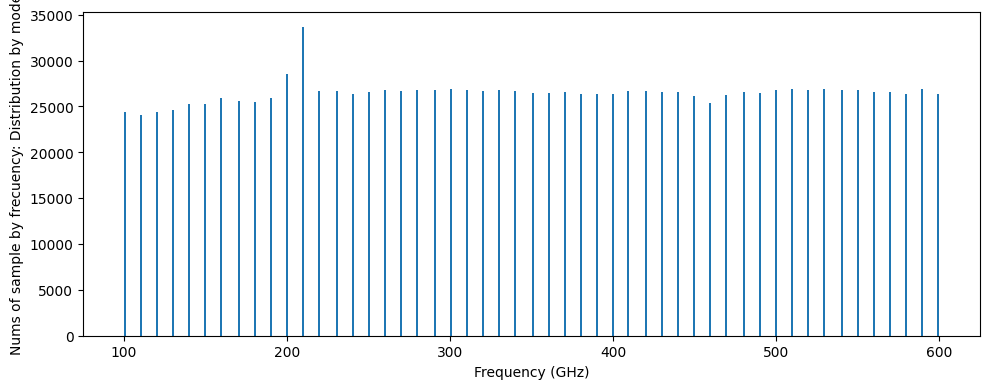

In [49]:
ax = balanced_train_ex['freq'].plot.hist(figsize=(10, 4), bins=408)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums of sample by frecuency')
ax.set_title('Distribution by mode')
plt.tight_layout()
plt.show()

In [5]:
min = label_train_ex.groupby(['target', 'freq']).size().min()
# Function to reduce samples to the min value
def reduce_to_min(df, target, frequency, min):
    # Filter the DataFrame for the specific sample and frequency
    freq_df = df[(df['target'] == target) & (df['freq'] == frequency)]
    # If the number of samples is greater than the min, sample down to the min
    return freq_df.sample(n=min, random_state=42)

# Apply the function to reduce target for each combination of Sample and Frequency (GHz)
tmp_balanced_data = []
for (target, frequency), group in label_train_ex.groupby(['target', 'freq']):
    tmp_balanced_data.append(reduce_to_min(label_train_ex, target, frequency, min))

# Combine the balanced samples into a single DataFrame
balanced_train_ex = pd.concat(tmp_balanced_data)

Check count values within each target and frequency

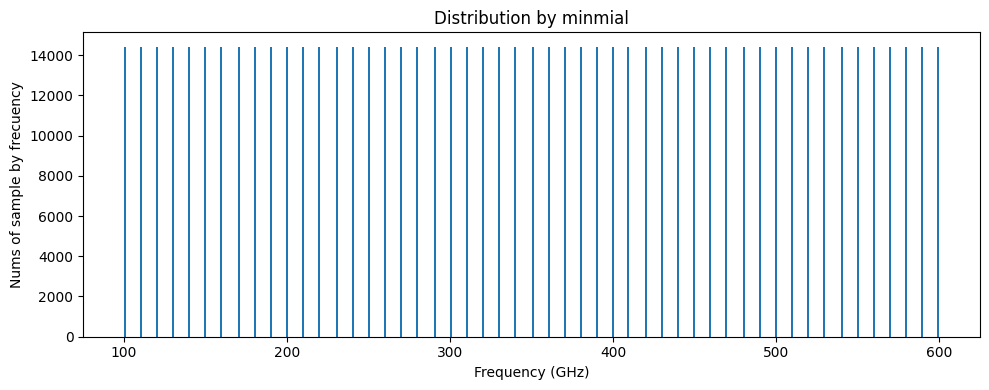

In [6]:
ax = balanced_train_ex['freq'].plot.hist(figsize=(10, 4), bins=408)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums of sample by frecuency')
ax.set_title('Distribution by minmial')
plt.tight_layout()
plt.show()

In [52]:
balanced_train_ex.head()

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original
174388,0.0,100.0,192.406312,-0.854611,e1,None
54765,0.0,100.0,-1.007203,27.896471,e4,B1_2
173662,0.0,100.0,102.429505,-0.732517,e1,None
105178,0.0,100.0,-0.152607,23.654010,e4,B1_9
55013,0.0,100.0,-1.434501,28.934196,e4,B1_2


In [56]:

grouped = balanced_train_ex.groupby([balanced_train_ex["target"], balanced_train_ex["freq"]]).count()

LG (mV)  HG (mV)  num_experiment  Sample_original
target freq                                                    
0.0    100.0     3603     3603            3603             3603
       110.0     3603     3603            3603             3603
       120.0     3603     3603            3603             3603
       130.0     3603     3603            3603             3603
       140.0     3603     3603            3603             3603
...               ...      ...             ...              ...
3.0    560.0     3603     3603            3603             3603
       570.0     3603     3603            3603             3603
       580.0     3603     3603            3603             3603
       590.0     3603     3603            3603             3603
       600.0     3603     3603            3603             3603

[204 rows x 4 columns]

**Doubts**: 
* There are several targets with samples below of mode, i.e: 100.0 Ghz, 130.0 Ghz. How affect `Thickness (mm)` attribute to study.

 ## Study the correlations between attributes

Encodes target labels with values between 0 and ``n_classes-1, so `A1` are `0`, `B1` are `1`,... and so on all categories

`A1`, `B1`, `C1`, `D1`, `E1`, `E2`, `E3`, `F1`, `G1`, `H1`, `I1`, `J1`, `K1`, `L1`, `M1`, `N1`, `REF`

In [ ]:
balanced_train_ex.head()

It is start to analice PE/tie/EVOH/tie/PE/Adhesivo/PE/tie/EVOH/tie/PE (0.2mm) `A1` category `0`

In [ ]:
df_tmp = balanced_train_ex[balanced_train_ex.target==0]

from pandas.plotting import scatter_matrix
attributes = ['freq', 'LG (mV)', 'HG (mV)']
ax = scatter_matrix(df_tmp[attributes], figsize=(12, 8))

**Insights**: The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the `HG (mV)` value tends to go up slightly when the `Frequency (GHz)` goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a big negative correlation between `LG (mV)` and the `Frequency (GHz)` 

**Evidende**: It can be interpreted that to measured plastic PE/tie/EVOH/tie/PE/Adhesivo/PE/tie/EVOH/tie/PE (0.2mm) `A1` category `0` getaworse response to since high frecuencies in the `LG (mV)`. So the measurement obtained in the low-pass filter is lower `LG (mV)` is better to low frecuencies, although it obtains response peaks at 600 GHz that would have to be explained why they occur


7oat64

In [ ]:
corr_matrix = df_tmp.corr()
corr_matrix['freq'].sort_values(ascending=False)

# Prepare the data to better expose the underlying data patterns

In [7]:
train_pr = balanced_train_ex.copy()
train_pr.head()


,target,freq,LG (mV),HG (mV),num_experiment,Sample_original
174388,0.0,100.0,192.406312,-0.854611,e1,None
54765,0.0,100.0,-1.007203,27.896471,e4,B1_2
173662,0.0,100.0,102.429505,-0.732517,e1,None
105178,0.0,100.0,-0.152607,23.654010,e4,B1_9
55013,0.0,100.0,-1.434501,28.934196,e4,B1_2


## Data Clean: Remove outliers

In [ ]:
train_ts_low_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].quantile(0.05)
train_ts_high_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].quantile(0.95)
train_ts_filtering = np.where(train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'] < train_ts_low_quan,
                                train_ts_low_quan,
                                train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'])

train_ts_filtering = pd.Series(train_ts_filtering, index=train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].index.to_numpy())
train_ts_filtering = np.where(train_ts_filtering > train_ts_high_quan,
                              train_ts_high_quan,
                              train_ts_filtering)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, train_ts_filtering)
ax.set_ylim([380, 525])
ax.set_title(' Filtering Outliers of time series of 350 GHz to HG (mV) of plastic type E1')
fig.show()


## Feature engineering
### Add promising transformations of features

In [32]:
train_pr = train_pr.astype({"freq": int, "target": int})

#https://stackoverflow.com/questions/43131715/pandas-new-column-by-combining-numbers-of-two-columns-as-strings
train_pr['freq_target'] = train_pr['freq'].astype(str) + train_pr['target'].astype(str)
train_pr['freq_target'].nunique() # train_pr['freq'].nunique() * train_pr['target'].nunique() 765 different measures



204

In [33]:
train_pr['freq_target'] = train_pr['freq_target'].astype(int)
#train_pr = train_pr.rename(columns = {'freq':'Frequency (GHz)'})

train_pr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735012 entries, 173164 to 2416828
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   target           735012 non-null  int64  
 1   freq             735012 non-null  int64  
 2   LG (mV)          735012 non-null  float64
 3   HG (mV)          735012 non-null  float64
 4   num_experiment   735012 non-null  object 
 5   Sample_original  735012 non-null  object 
 6   index_original   735012 non-null  int64  
 7   LG (mV)_shifted  735012 non-null  float64
 8   HG (mV)_shifted  735012 non-null  float64
 9   HG_div_LG        735012 non-null  float64
 10  freq_target      735012 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 67.3+ MB


**Doubts**: Normalize freq_target?

## Add transformations of features

#### Aggregate features into promising new features: HG_div_LG

In [54]:
#Find out if zeros before to Aggregate features
df_temp = train_pr.rename(columns={'LG (mV)': 'LG_mV','HG (mV)': 'HG_mV' })
df_temp[df_temp.LG_mV==0] # 55657 zeros
df_temp[df_temp.HG_mV==0] # 15316 zeros

,target,freq,LG_mV,HG_mV,num_experiment,Sample_original,index_original
172733,0.0,100.0,164.692962,0.0,e1,None,172733
173124,0.0,100.0,82.651700,0.0,e1,None,173124
173001,0.0,100.0,274.813829,0.0,e1,None,173001
174391,0.0,100.0,162.373345,0.0,e1,None,174391
174727,0.0,100.0,162.129176,0.0,e1,None,174727
...,...,...,...,...,...,...,...
2416120,3.0,590.0,-0.244170,0.0,e1,None,2416120
2413391,3.0,590.0,-0.488341,0.0,e1,None,2413391
2413874,3.0,590.0,0.732511,0.0,e1,None,2413874
2419565,3.0,600.0,-1.953363,0.0,e1,None,2419565


In [64]:
train_pr.nsmallest(1,'LG (mV)')['LG (mV)'].values[0] # -49.810767	
train_pr.nsmallest(1,'HG (mV)')['HG (mV)'].values[0] # -16.969845
train_pr.nlargest(1,'LG (mV)')['LG (mV)'].values[0] # 274.813829	
train_pr.nlargest(1,'HG (mV)')['HG (mV)'].values[0] # 1149.43229


-16.969845

Slide all values to remove zeros and Aggregate features into promising new features

In [8]:
train_pr['LG (mV)_shifted'] = train_pr['LG (mV)'].apply(lambda x: np.sum([x, 100]))
train_pr['HG (mV)_shifted'] = train_pr['HG (mV)'].apply(lambda x: np.sum([x, 100]))
train_pr['HG_div_LG'] = train_pr['HG (mV)_shifted']/train_pr['LG (mV)_shifted']
train_pr.head()

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,LG (mV)_shifted,HG (mV)_shifted,HG_div_LG
174388,0.0,100.0,192.406312,-0.854611,e1,None,292.406312,99.145389,0.339067
54765,0.0,100.0,-1.007203,27.896471,e4,B1_2,98.992797,127.896471,1.291978
173662,0.0,100.0,102.429505,-0.732517,e1,None,202.429505,99.267483,0.490381
105178,0.0,100.0,-0.152607,23.654010,e4,B1_9,99.847393,123.654010,1.238430
55013,0.0,100.0,-1.434501,28.934196,e4,B1_2,98.565499,128.934196,1.308107


In [9]:
train_pr.nsmallest(1,'HG_div_LG')['HG_div_LG'].values[0] # 0.264913931
train_pr.nlargest(1,'HG_div_LG')['HG_div_LG'].values[0] # 12.45292894
train_pr_shifted = train_pr.drop(columns=['LG (mV)_shifted', 'HG (mV)_shifted'])
train_pr_shifted.head()

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,HG_div_LG
174388,0.0,100.0,192.406312,-0.854611,e1,None,0.339067
54765,0.0,100.0,-1.007203,27.896471,e4,B1_2,1.291978
173662,0.0,100.0,102.429505,-0.732517,e1,None,0.490381
105178,0.0,100.0,-0.152607,23.654010,e4,B1_9,1.238430
55013,0.0,100.0,-1.434501,28.934196,e4,B1_2,1.308107


#### Add descriptive and statistics for each freq

In [10]:
grouped = train_pr.groupby(train_pr["freq"])
grouped_LG_mV = grouped['LG (mV)']
grouped_HG_mV = grouped['HG (mV)']
# https://stackoverflow.com/questions/32938060/reverting-from-multiindex-to-single-index-dataframe-in-pandas
df_grouped_LG_mV = grouped_LG_mV.agg(['mean','std', 'var','median']).reset_index(level=[0])
df_grouped_HG_mV = grouped_HG_mV.agg(['mean','std','var','median']).reset_index(level=[0])


In [11]:
df_grouped_LG_mV.head()


,freq,mean,std,var,median
0,100.0,46.900510,52.421831,2748.048394,36.625564
1,110.0,51.840195,24.492045,599.860244,49.780247
2,120.0,81.472673,46.729884,2183.682054,81.675014
3,130.0,39.177234,8.375285,70.145393,38.945183
4,140.0,68.447837,15.324020,234.825577,67.391038


In [12]:
train_pr_shifted.head()

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,HG_div_LG
174388,0.0,100.0,192.406312,-0.854611,e1,None,0.339067
54765,0.0,100.0,-1.007203,27.896471,e4,B1_2,1.291978
173662,0.0,100.0,102.429505,-0.732517,e1,None,0.490381
105178,0.0,100.0,-0.152607,23.654010,e4,B1_9,1.238430
55013,0.0,100.0,-1.434501,28.934196,e4,B1_2,1.308107


In [14]:
train_pr_stats = pd.merge(train_pr_shifted, df_grouped_LG_mV, how='left', on='freq').rename(columns = {'mean':'mean_LG',
                                                                                                       'std':'std_LG',
                                                                                                       'var':'var_LG',
                                                                                                       'median':'median_LG'})
train_pr_stats = pd.merge(train_pr_stats, df_grouped_HG_mV, how='left', on='freq').rename(columns = {'mean':'mean_HG', 
                                                                                                     'std': 'std_HG',
                                                                                                     'var':'var_HG',
                                                                                                     'median':'median_HG'})


In [15]:
train_pr_stats.head()

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
0,0.0,100.0,192.406312,-0.854611,e1,None,0.339067,46.90051,52.421831,2748.048394,36.625564,10.29678,16.408205,269.229177,0.610399
1,0.0,100.0,-1.007203,27.896471,e4,B1_2,1.291978,46.90051,52.421831,2748.048394,36.625564,10.29678,16.408205,269.229177,0.610399
2,0.0,100.0,102.429505,-0.732517,e1,None,0.490381,46.90051,52.421831,2748.048394,36.625564,10.29678,16.408205,269.229177,0.610399
3,0.0,100.0,-0.152607,23.654010,e4,B1_9,1.238430,46.90051,52.421831,2748.048394,36.625564,10.29678,16.408205,269.229177,0.610399
4,0.0,100.0,-1.434501,28.934196,e4,B1_2,1.308107,46.90051,52.421831,2748.048394,36.625564,10.29678,16.408205,269.229177,0.610399


In [5]:
train_pr_stats.tail()

,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,index_original,HG_div_LG,freq_target,mean_LG,std_LG,var_x,median_x,mean_HG,std_HG,var_y,median_y
735007,3,600,-0.244170,20.144060,e1,None,2420390,1.204381,6003,0.034062,0.887436,0.787543,0.0,15.253943,10.876624,118.30094,14.0398
735008,3,600,-0.732511,19.533634,e2,None,915666,1.204157,6003,0.034062,0.887436,0.787543,0.0,15.253943,10.876624,118.30094,14.0398
735009,3,600,-0.122085,28.567940,e1,None,2416986,1.287251,6003,0.034062,0.887436,0.787543,0.0,15.253943,10.876624,118.30094,14.0398
735010,3,600,0.488341,29.300451,e2,None,985852,1.286721,6003,0.034062,0.887436,0.787543,0.0,15.253943,10.876624,118.30094,14.0398
735011,3,600,1.098767,7.325113,e1,None,2416828,1.061587,6003,0.034062,0.887436,0.787543,0.0,15.253943,10.876624,118.30094,14.0398


In [16]:
train_pr_stats.columns

Index(['target', 'freq', 'LG (mV)', 'HG (mV)', 'num_experiment',
       'Sample_original', 'HG_div_LG', 'mean_LG', 'std_LG', 'var_LG',
       'median_LG', 'mean_HG', 'std_HG', 'var_HG', 'median_HG'],
      dtype='object')

## Feature scaling standardize
Neural networks and SVMs, are very sensitive to the scaling of the data


In [ ]:
train_pr.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(train_pr[['LG (mV)','HG (mV)']].to_numpy()) 
X_train_scaled = pd.DataFrame(X_train_scaled,
                              index=train_pr.index.tolist(),
                              columns=['LG (mV) scaled', 'HG (mV) scaled'])
train_pr_scaled = pd.concat([train_pr,X_train_scaled],axis=1).drop(columns=['LG (mV)', 'HG (mV)'])


**Doubt**: Always applies exactly the same transformation to the training and the test set. 

In [ ]:
train_pr_scaled.head()

# Explore different models

Mean (mV) by LG filter of each plastic to 300 Ghz looks a good to classifier

In [17]:
train_mo = train_pr_stats.copy()
train_mo = train_mo.sample(frac=0.1, random_state=1)
train_mo.head()


,target,freq,LG (mV),HG (mV),num_experiment,Sample_original,HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
316103,1.0,460.0,0.488341,25.882065,e1,None,1.252703,0.097434,0.806751,0.650847,0.122085,92.056865,57.599647,3317.719387,97.439268
582703,3.0,180.0,14.772311,0.122142,e1,None,0.872355,19.685214,5.424811,29.428572,19.167379,-0.002840,0.661809,0.437991,0.000000
689099,3.0,480.0,0.244170,102.673666,e3,REF_4,2.021800,0.091727,0.781590,0.610883,0.122085,69.650400,38.260890,1463.895734,62.110852
257509,1.0,300.0,3.540471,0.854611,e1,None,0.974060,2.114037,1.103325,1.217325,1.953363,20.736810,84.029870,7061.019118,0.122094
82493,0.0,320.0,0.732511,136.247158,e1,None,2.345292,1.128884,0.892709,0.796929,1.098767,422.233472,331.496347,109889.827936,383.591771


The validation set `X_va` and `y_va` is used during the training phase of the model to provide an unbiased evaluation of the model's performance and to fine-tune the model's parameters.

In [ ]:
train_ex_orig = train_ex.copy()
train_ex = train_mo.copy().drop(columns=['target', 'freq', 'num_experiment', 'HG_div_LG'])
train_ex.info()

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

for f in train_ex['freq'].value_counts().index.sort_values().tolist():
    freq = f
    ncols = 5
    nrows = 3
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r ,c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"Train Model samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()        

In [ ]:
train_ex = train_ex_orig.copy()
del train_ex_orig

In [22]:
train_mo = train_mo.copy().drop(columns=['num_experiment', 'Sample_original'])
train_mo.head()

,target,freq,LG (mV),HG (mV),HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
316103,1.0,460.0,0.488341,25.882065,1.252703,0.097434,0.806751,0.650847,0.122085,92.056865,57.599647,3317.719387,97.439268
582703,3.0,180.0,14.772311,0.122142,0.872355,19.685214,5.424811,29.428572,19.167379,-0.002840,0.661809,0.437991,0.000000
689099,3.0,480.0,0.244170,102.673666,2.021800,0.091727,0.781590,0.610883,0.122085,69.650400,38.260890,1463.895734,62.110852
257509,1.0,300.0,3.540471,0.854611,0.974060,2.114037,1.103325,1.217325,1.953363,20.736810,84.029870,7061.019118,0.122094
82493,0.0,320.0,0.732511,136.247158,2.345292,1.128884,0.892709,0.796929,1.098767,422.233472,331.496347,109889.827936,383.591771


In [23]:
from sklearn.model_selection import train_test_split
train_set, validate_set = train_test_split(train_mo, test_size=0.2, random_state=42)

y_tr = train_set.target
y_va = validate_set[['target']]


X_tr = train_set.drop(columns=['target', 'freq'])

X_va_freq_target = validate_set.copy()
X_va = validate_set.drop(columns=[ 'target', 'freq'])



In [24]:
X_tr.head()

,LG (mV),HG (mV),HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
610605,3.052130,-0.122070,0.969198,3.921452,1.366193,1.866483,3.784642,0.167783,0.656148,0.430531,0.152606
175989,0.244170,19.899890,1.196078,0.035640,0.767154,0.588526,0.030521,23.084811,12.782570,163.394096,22.219509
192709,29.483579,-0.396764,0.769234,81.472673,46.729884,2183.682054,81.675014,0.001861,0.654005,0.427723,0.000000
677959,1.709193,167.256749,2.627656,0.139942,0.793219,0.629196,0.122085,120.523991,57.719611,3331.553528,102.307409
381010,30.643389,1.342916,0.775722,39.177234,8.375285,70.145393,38.945183,-0.012124,0.655339,0.429470,-0.000024


In [25]:
X_va_freq_target.head()

,target,freq,LG (mV),HG (mV),HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
271870,1.0,340.0,0.000000,394.579440,4.945794,0.807906,0.856974,0.734404,0.854596,415.057429,251.980434,63494.139022,499.099633
670173,3.0,430.0,1.587108,79.965816,1.771542,0.208734,0.821946,0.675596,0.213649,172.255603,60.653634,3678.863328,176.901455
264081,1.0,320.0,0.885118,675.863752,7.690567,1.128884,0.892709,0.796929,1.098767,422.233472,331.496347,109889.827936,383.591771
378484,2.0,130.0,44.927359,0.640959,0.694423,39.177234,8.375285,70.145393,38.945183,-0.012124,0.655339,0.429470,-0.000024
332149,1.0,510.0,-0.122085,-3.906727,0.962107,0.062163,0.774308,0.599553,0.061043,43.348439,26.854796,721.180062,43.340251


**Cojeture**: Look samples are homogenius

## Train many quick and dirty models 

In [26]:
import time
start_time = time.time()

In [27]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = dummy_clf.predict(X_va.to_numpy())

from sklearn.metrics import accuracy_score
dummy_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [28]:
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = logit_clf.predict(X_va.to_numpy())
logit_score = accuracy_score(y_va.target.to_numpy(), y_pred)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = sgd_clf.predict(X_va.to_numpy())
sgd_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [30]:
from sklearn.svm import SVC
svc_clf = SVC().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = svc_clf.predict(X_va.to_numpy())
svc_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [31]:
svc_score_scaled = 0

In [32]:
bayes_score=0
from sklearn.naive_bayes import MultinomialNB
#bayes_clf = MultinomialNB().fit(X_tr.to_numpy(), y_tr.to_numpy())
#bayes_score = accuracy_score(y_va.target.to_numpy(), y_pred)

# ValueError: Negative values in data passed to MultinomialNB (input X)

In [33]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = ridge_clf.predict(X_va.to_numpy())
ridge_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf = KNeighborsClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = neigh_clf.predict(X_va.to_numpy())
neigh_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [35]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = tree_clf.predict(X_va.to_numpy())
tree_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [36]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = rnd_clf.predict(X_va.to_numpy())
rnd_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = gb_clf.predict(X_va.to_numpy())
gb_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [38]:
run_time = time.time() - start_time
print(f"Run Time: {run_time:.2f}s")


Run Time: 409.63s


In [39]:

lst_accuracy_score = [bayes_score, dummy_score, gb_score, logit_score, neigh_score, ridge_score, rnd_score, sgd_score, svc_score, svc_score_scaled, tree_score]
lst_name_clf = ['bayes', 'dummy', 'gb', 'logit', 'neigh', 'ridge', 'rnd', 'sgd', 'svc', 'svc_scaled', 'tree' ]


df_scores = pd.DataFrame({
"name_clf" : lst_name_clf,
"accuracy_score" : lst_accuracy_score
})

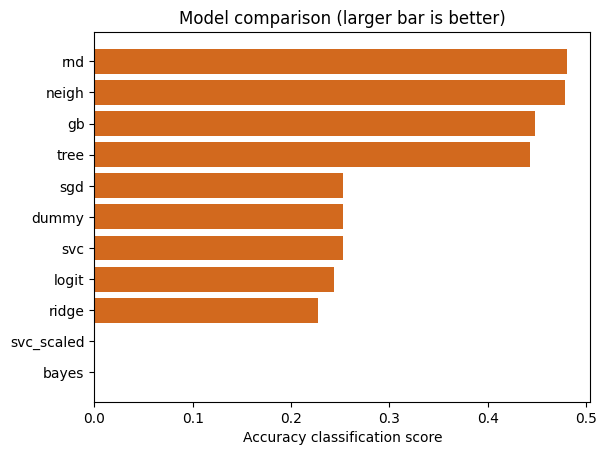

In [40]:
df_scores.sort_values('accuracy_score', ascending=True, inplace=True)
plt.barh(np.arange(len(lst_name_clf)), df_scores.accuracy_score, color='chocolate')
plt.yticks(np.arange(len(lst_name_clf)), df_scores.name_clf)
#plt.xlim(0, 1.2)
plt.title('Model comparison (larger bar is better)')
plt.xlabel('Accuracy classification score')
plt.show()

## Measure and compare classifiers performance and frecuencies

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [42]:
cm = confusion_matrix(y_va_350.target.to_numpy(), y_pred_350, labels=neigh_clf_350.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh_clf_350.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix to k-nearest neighbor to 350 Ghz')
disp.plot(ax=ax)

NameError: name 'y_va_350' is not defined

## Analyze the types of errors the models make
Study best classifier to best frequency

In [ ]:
train_mo = train_pr_shifted.copy().rename(columns = {'Frequency (GHz)':'freq'})
train_mo_350 = train_mo[train_mo.freq == 350].drop(columns=['freq_target']) 
train_mo_350.info()

In [ ]:
train_mo_350['exp(HG)'] = train_mo_350['HG (mV)'].apply(lambda x: np.expm1(x/1000))
train_mo_350.head()

Binning, Discretization, Linear Models, and Trees

In [ ]:
warnings.filterwarnings('ignore')
freq = 350
ncols = 5
nrows = 3
nums_plastics = 0

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
for r in range(nrows):
    for c in range (ncols):
        t = train_mo_350['target'].value_counts().index.sort_values().tolist()
        df_tmp = train_mo_350[(train_mo_350.freq == freq) & (train_mo_350.target == t[nums_plastics])]
        sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
        sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
        axes[r ,c].legend(fontsize="xx-small")
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel('')
        axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
        nums_plastics = nums_plastics +1
plt.suptitle(f"All samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
plt.show()   

In [ ]:
train_set_350, validate_set_350 = train_test_split(train_mo_350, test_size=0.2, random_state=42)

y_tr_350 = train_set_350.target
y_va_350 = validate_set_350[['target']]

X_tr_350 = train_set_350.drop(columns=['target'])
X_va_350 = validate_set_350.drop(columns=['target'])
X_tr_350.info()

In [ ]:
neigh_clf_350 = KNeighborsClassifier().fit(X_tr_350.to_numpy(), y_tr_350.to_numpy())
y_pred_350 = neigh_clf_350.predict(X_va_350.to_numpy())
neigh_score_350 = accuracy_score(y_va_350.target.to_numpy(), y_pred_350) #0.5896686159844055

In [ ]:

cm = confusion_matrix(y_va_350.target.to_numpy(), y_pred_350, labels=neigh_clf_350.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh_clf_350.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix to k-nearest neighbor to 350 Ghz')
disp.plot(ax=ax)

Columns are type produced and rows are type preceved. 

* `Type 0`: 256 samples are produced and perceived well. 97 are perceived like type 2, 48 samples as type 4, and so on
* `Type 1`: 261 samples are produced and perceived well. 173 are perceived like type 9, 43 samples as type 12, and so on
* etc.

In [ ]:
freq = 350
ncols = 2
nrows = 10
i = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 28))
for r in range(nrows):
    for c in range (ncols):
        t = [0, 2, 0, 7, 1, 9, 1, 14, 2, 4, 4, 8, 5, 12, 8, 13, 9, 14, 12, 14]
        df_tmp = train_mo_350[(train_mo_350.freq == freq) & (train_mo_350.target == t[i])]
        sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
        sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
        #sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)x2',  fill =True )
        axes[r ,c].legend(fontsize="xx-small")
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel('')
        axes[r, c].set_title(f"Type {t[i]} (mV)",fontsize=7)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
        i = i + 1
plt.suptitle(f"Major mistakes produced and preceved of each plastic at {freq} Ghz", y=0.93,fontsize=10)
plt.show()   

In [ ]:
train_mo_350_t12 = train_mo_350[train_mo_350.target==12]['HG (mV)']
sns.kdeplot(train_mo_350_t12,color='#00BFC4', label='HG (mV)', fill =True)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='onehot-dense')
kb.fit(train_mo_350_t12.values.reshape(-1, 1))
train_mo_350_binned = kb.transform(train_mo_350_t12.values.reshape(-1, 1))
kb.bin_edges_[0]

In [ ]:
temp = np.array([1,2,3])
temp.reshape(-1, 1)
temp.reshape(1, -1)

np.random.random((1,10))[0]

# Present your solution

In [43]:
train_sol = train_mo.copy()
train_sol.head()

,target,freq,LG (mV),HG (mV),HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
316103,1.0,460.0,0.488341,25.882065,1.252703,0.097434,0.806751,0.650847,0.122085,92.056865,57.599647,3317.719387,97.439268
582703,3.0,180.0,14.772311,0.122142,0.872355,19.685214,5.424811,29.428572,19.167379,-0.002840,0.661809,0.437991,0.000000
689099,3.0,480.0,0.244170,102.673666,2.021800,0.091727,0.781590,0.610883,0.122085,69.650400,38.260890,1463.895734,62.110852
257509,1.0,300.0,3.540471,0.854611,0.974060,2.114037,1.103325,1.217325,1.953363,20.736810,84.029870,7061.019118,0.122094
82493,0.0,320.0,0.732511,136.247158,2.345292,1.128884,0.892709,0.796929,1.098767,422.233472,331.496347,109889.827936,383.591771


## Explain why your solution achieves the objective


**Notice**: Type of plastic are changed by numbers so `A1`, `B1`, `C1`, `D1`, `E1`, `E2`, `E3`, `F1`, `G1`, `H1`, `I1`, `J1`, `K1`, `L1`, `M1`, `N1`, `REF` are `0`, `1`, `2`, `3`, `4`, etc. and so on

In [44]:
lst_target = validate_set['target'].drop_duplicates().sort_values().values.tolist()
lst_freq = test_set['freq'].drop_duplicates().sort_values().values.tolist()

### Evaluate the accuracy of a classification of the best classificator

In [60]:
y_pred = rnd_clf.predict(X_va.to_numpy())

Compare true target with predictions to evaluate solutions

In [61]:
y_va_sol = y_va.copy() 
y_va_sol['y_pred'] = y_pred 
y_va_sol['true_pred'] = np.where(y_va_sol['y_pred'] == y_va_sol['target'],1,0)

X_va_freq = pd.concat([y_va_sol,X_va_freq_target[['freq']]], axis=1)
X_va_freq.head()


,target,y_pred,true_pred,freq
271870,1.0,1.0,1,340.0
670173,3.0,1.0,0,430.0
264081,1.0,1.0,1,320.0
378484,2.0,0.0,0,130.0
332149,1.0,1.0,1,510.0


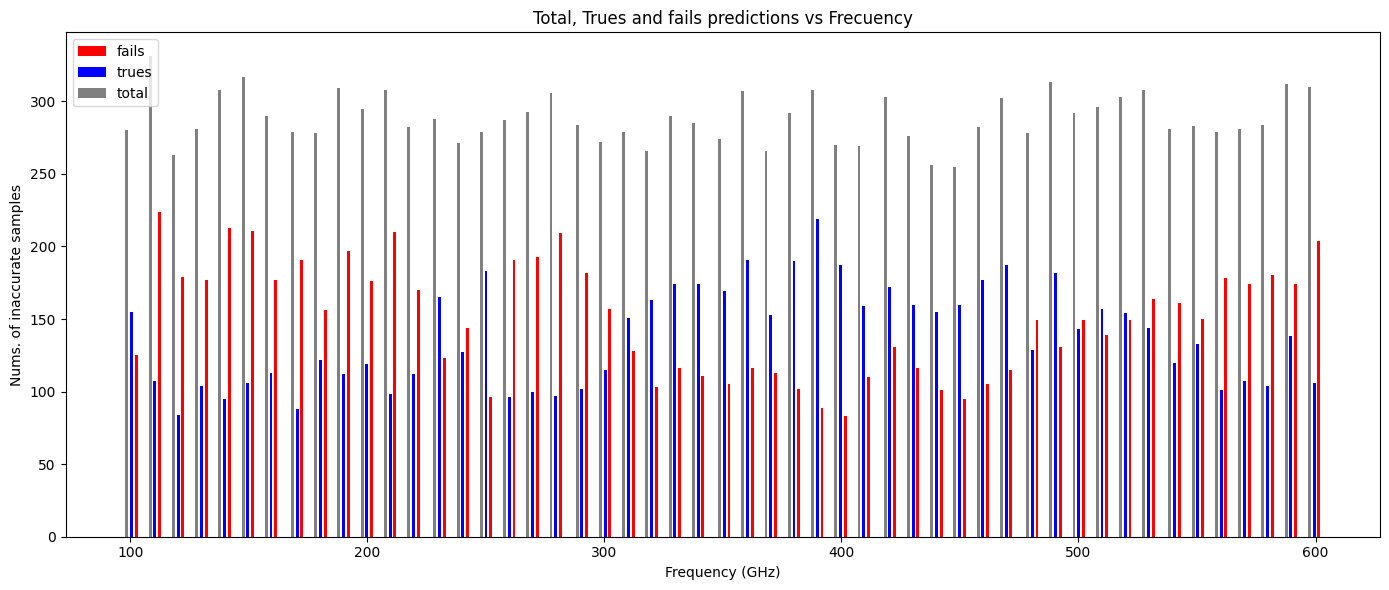

In [62]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_va_freq[X_va_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_va_freq[X_va_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_va_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Total, Trues and fails predictions vs Frecuency')
plt.tight_layout()
plt.show()

**Insights** : 
* Central frecuencies have less fails than lower and upper frecuencies
* The frequency with the highest accuracy can now be identified: `350 Ghz`get").

### Count the number of times instances of types of plastics are misclassified

**Code_Fixit**: change 

In [63]:

y_pred = rnd_clf.predict(X_va.to_numpy())
gb_score = accuracy_score(y_va.target.to_numpy(), y_pred)

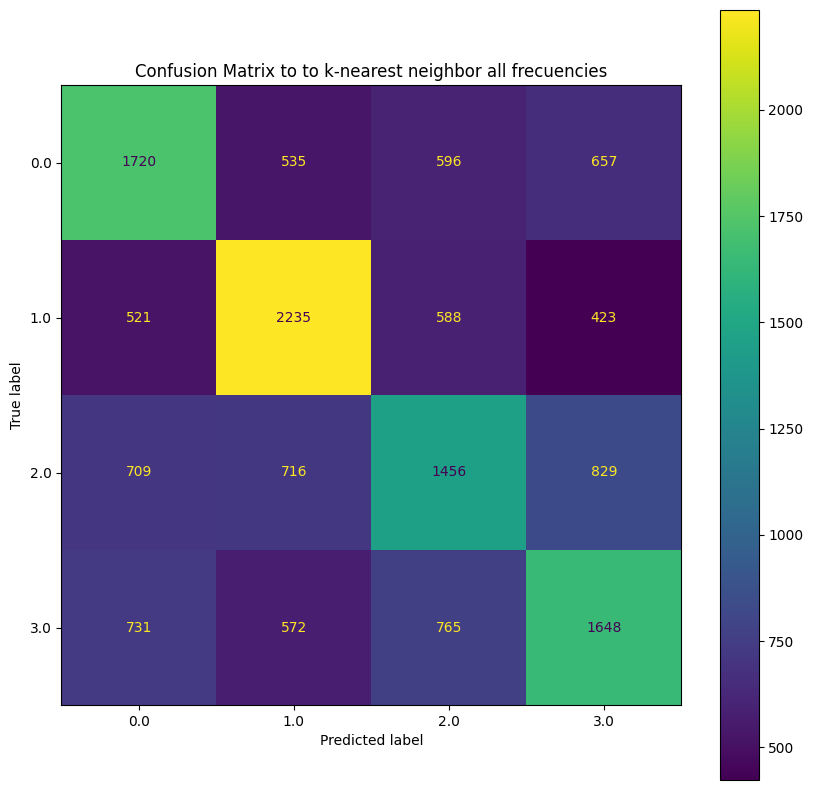

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_va.target.to_numpy(), y_pred, labels=neigh_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh_clf.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix to to k-nearest neighbor all frecuencies')
disp.plot(ax=ax)

**Insights**:
* Count the number of times instances of class `0` (or `A1`) are classified as otherone class `1`, `2` and so on. The first row of this matrix shows 418 (of 1224 samples) were correctly classified and non class 806 (115+89+57+116+38+54+47+53+27+25+30+34+47+74) were wrongly classified. 115 as type 1,  89 as type 2 and so on. 
* Besides, the first columns shows that class `0`  were wrongly classified 1795 (159+170+119+197+85+119+112+127+99+86+119+121+114+168) by other class. He might be the plastic which was most often confused by other plastic.


### Of validate dataset, explore what frecuencies classified by target 

In [65]:
X_va_inaccurate = X_va_freq[X_va_freq.true_pred==0]

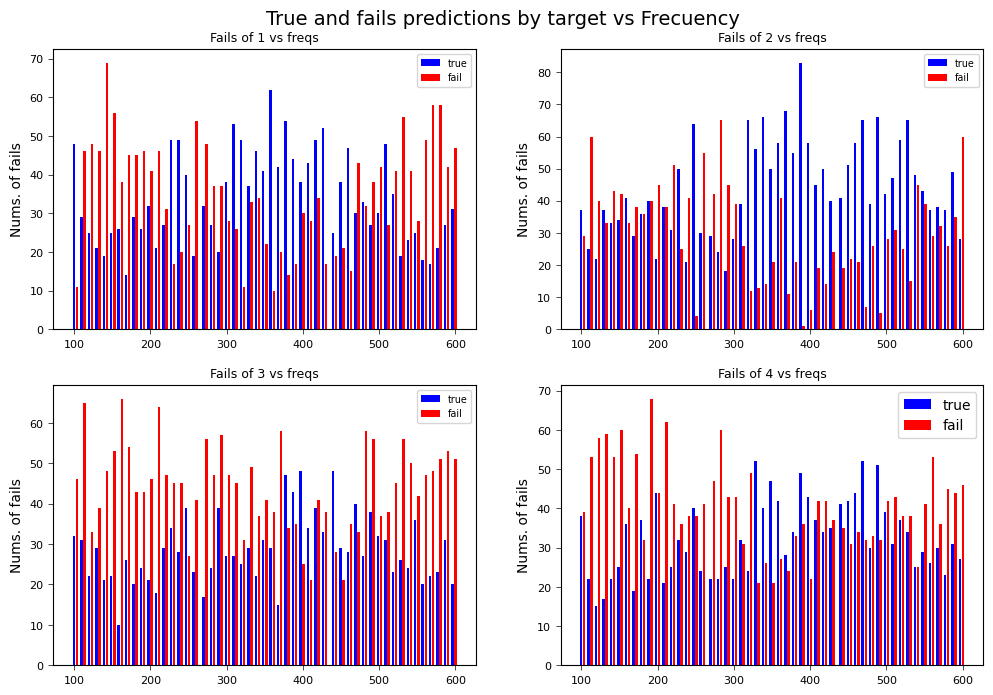

In [68]:
ncols = 2
nrows = 2
t = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
for r in range(nrows):
     for c in range(ncols):

        x_fail = X_va_freq[(X_va_freq.true_pred==1) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, -2]))
        counts_f, bins_f = np.histogram(x_fail, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_f[:-1], bins_f, weights=counts_f, histtype='bar', label="true", color="blue")
        
        x_total = X_va_freq[(X_va_freq.true_pred==0) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, +2]))
        counts_t, bins_t = np.histogram(x_total, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_t[:-1], bins_t, weights=counts_t, histtype='bar', label="fail", color="red")
         
        t = t +1
        axes[r ,c].legend(fontsize="x-small")
        axes[r, c].set_ylabel('Nums. of fails')
        axes[r, c].set_title(f'Fails of {t} vs freqs',fontsize=9)
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
plt.suptitle(f"True and fails predictions by target vs Frecuency", y=0.93,fontsize=14)
plt.legend()
plt.show()           


**Insights**: 
'B1', 'C1', 'E1', 'REF' 

* The material that is detected with the highest accuracy can now be identified: Type 3, 4, 11, 12, and 14 at various frequencies, type 8 and 15 at 350, type 13 at 250.
* The material with the lowest accuracy can now be identified, type 2 and 9 show failures at all frequencies.